Heberman assignment Applied AI
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Number of Instances: 305
Number of Attributes: 4 (including the class attribute)
Attribute Information:
1.Age of patient at time of operation (numerical)
2.Patient's year of operation (year - 1900, numerical)
3.Number of positive axillary nodes detected (numerical)
4.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
5.Missing Attribute Values: None
Assignment :
1.High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
2.Explain our objective.
3.Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
4.Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
5.Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
haberman=pd.read_csv('haberman.csv')

Find High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [10]:
print(haberman.shape)

(305, 4)


In [11]:
haberman['surv_status'].value_counts()

Yes    224
No      81
Name: surv_status, dtype: int64

Solutions 
number of points =305 ,
number of features = 3(independent variable),
number of classes =2, 
datapoints per class = 224 & 81

#Objective is to find patient could survive for given set of inputs - age, year of operation & number of axiliary nodes present. 
surv_status= Yes= patient survived 5 years or .,
longer surv_status= No= the patient died within 5 year

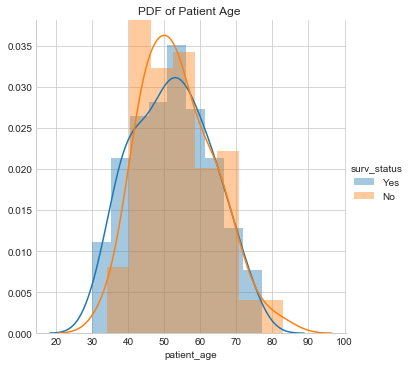

In [60]:
# Analysis using PDF(probability density Function )
#1. PDF for patient_age . effection of patient age on survival chances
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('PDF of Patient Age ')
plt.show();

Observed from above  
1.Between age 30 to 34 survival chances is high. 2.Above age 77 survival chances is negligible 

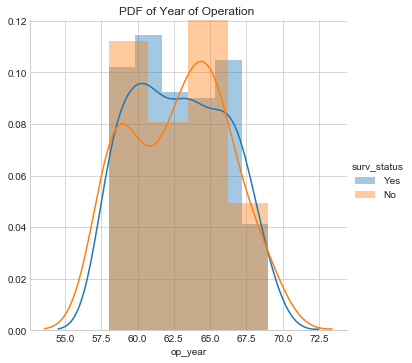

In [61]:
#2. PDF for  operation year
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend()
plt.title('PDF of Year of Operation ')
plt.show();

Observations : Survival chances are not dependent on year of operation . surviving status  overlapping 

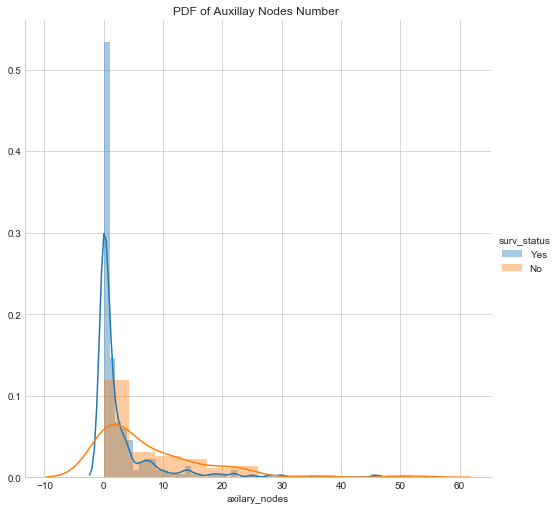

In [62]:
#3.PDF for Axillary nodes present 
sns.FacetGrid(haberman, hue="surv_status", size=7) \
   .map(sns.distplot, "axilary_nodes") \
   .add_legend();
plt.title('PDF of Auxillay Nodes Number ')
plt.show();

Observations from above 
            : 1.if axillary nodes no up to 2 then survival  chances are high.
              2.As axillary nodes number increases survival chances decreases
              3.Auxillary nodes are dense between o to 2

Conclusions from PDF :
    1.As axillary nodes number increases survival chances decreases
    2.If age is less than 34 then survival chances are higher and if age is greater than 77 survival chances are lower. 
      In between age 34 to 77 survival chances are not depend on Age

In [73]:
# Ananlysis using CDF 
haberman_Yes=haberman.loc[haberman['surv_status']=='Yes']
haberman_No=haberman.loc[haberman['surv_status']=='No']


[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


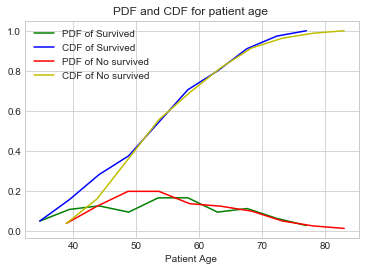

In [59]:
#Plot CDF of patient age 
#survival yes
import numpy as np
counts, bin_edges = np.histogram(haberman_Yes['patient_age'], bins=10, density = True)
 
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
sns.set_style('whitegrid')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'g',label='PDF of Survived ')
plt.plot(bin_edges[1:], cdf,'b',label='CDF of Survived')

#survival No
counts, bin_edges = np.histogram(haberman_No['patient_age'], bins=10, density = True)
 
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,'r',label='PDF of No survived ')
plt.plot(bin_edges[1:], cdf,'y',label='CDF of No survived')
plt.legend()
plt.xlabel('Patient Age ')
plt.title('PDF and CDF for patient age ')
plt.show()

 (Note : i have changed in survival column 1 as Yes and 2 as No in original csv file because after one run it shows NaN instead of Yes/No)
Observations:from above CDF it shows that surviaval chances are uniformly distributed to patients age

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


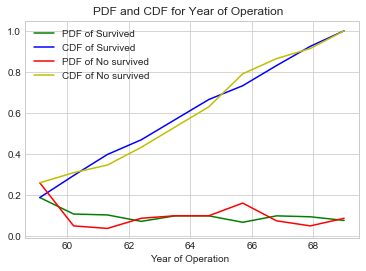

In [46]:
#CDF for survival chances on operation year
counts, bin_edges = np.histogram(haberman_Yes['op_year'], bins=10, density = True)
 
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,'g',label='PDF of Survived ')
plt.plot(bin_edges[1:], cdf,'b',label='CDF of Survived')


counts, bin_edges = np.histogram(haberman_No['op_year'], bins=10, density = True)
 
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,'r',label='PDF of No survived ')
plt.plot(bin_edges[1:], cdf,'y',label='CDF of No survived')
plt.legend()
plt.xlabel('Year of Operation  ')
plt.title('PDF and CDF for Year of Operation  ')
plt.show()

In [ ]:
Observation :Survival chances not clearly depend upon year of operation 

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


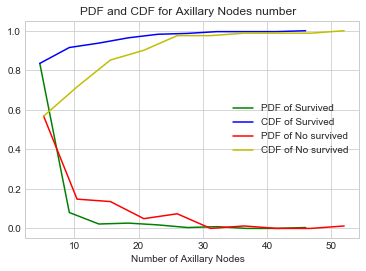

In [47]:
#CDF for survival chances on Auxillary Nodes numbers
counts, bin_edges = np.histogram(haberman_Yes['axilary_nodes'], bins=10, density = True)
 
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,'g',label='PDF of Survived ')
plt.plot(bin_edges[1:], cdf,'b',label='CDF of Survived')

counts, bin_edges = np.histogram(haberman_No['axilary_nodes'], bins=10, density = True)
 
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,'r',label='PDF of No survived ')
plt.plot(bin_edges[1:], cdf,'y',label='CDF of No survived')
plt.legend()
plt.xlabel('Number of Axillary Nodes   ')
plt.title('PDF and CDF for Axillary Nodes number  ')
plt.show()

Observations:1.90% who survived has axillary nodes no less than 10           

Conclusion From CDF: 1.As axillary nodes number increases survival chances decreases . lower axilary nodes number leads to higher survival chances.

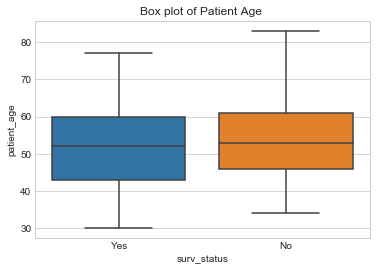

In [63]:
#box plot Analysis 
# Box plot of Patient Age
sns.boxplot(x='surv_status',y='patient_age', data=haberman)
plt.title('Box plot of Patient Age ')
plt.show()

Observation : 75% of patient survived has age less than 60

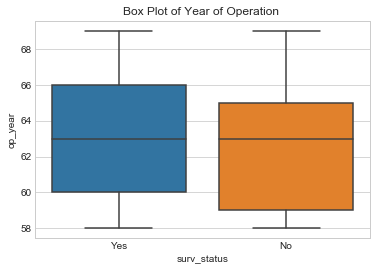

In [64]:
#Box plot of Year of operation 
sns.boxplot(x='surv_status',y='op_year', data=haberman)
plt.title('Box Plot of Year of Operation ')
plt.show()

Observations: initially surviving period was less .  
              25% patient who could not survived before 1959

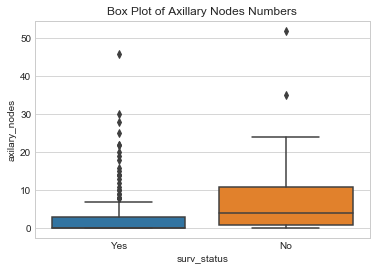

In [65]:
#Box plot of Axillary Nodes 
sns.boxplot(x='surv_status',y='axilary_nodes', data=haberman)
plt.title('Box Plot of Axillary Nodes Numbers')
plt.show()

Observations :1.75 % patient who survived has axillary nodes no less than 5
              2.50% patient who could not survive has axillary nodes between 0 to 10

In [ ]:
Conclusion from Box plot:1.As axillary nodes number increases survival chances decreases .
                         2.Before Year 1959 survival chances was lower 

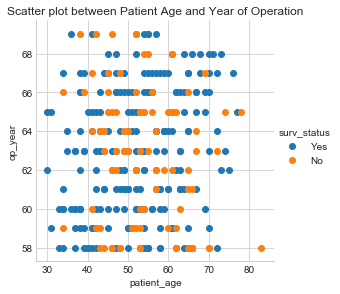

In [50]:
#Scatter plot analysis 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "patient_age", "op_year") \
   .add_legend()
plt.title('Scatter plot between Patient Age and Year of Operation')
plt.show();

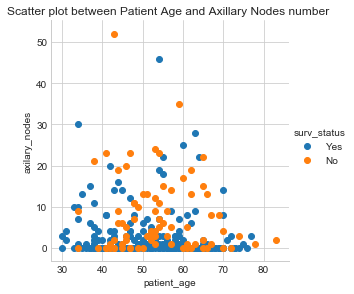

In [51]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "patient_age", "axilary_nodes") \
   .add_legend()
plt.title('Scatter plot between Patient Age and Axillary Nodes number ')
plt.show();

In [ ]:
Observation : Up to age 30 surviving chances are 100%

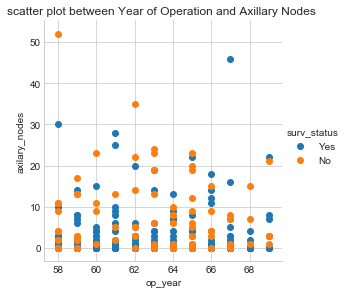

In [52]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "op_year", "axilary_nodes") \
   .add_legend()
plt.title('scatter plot between Year of Operation and Axillary Nodes ')
plt.show();

Observation : Overlapping in nature 


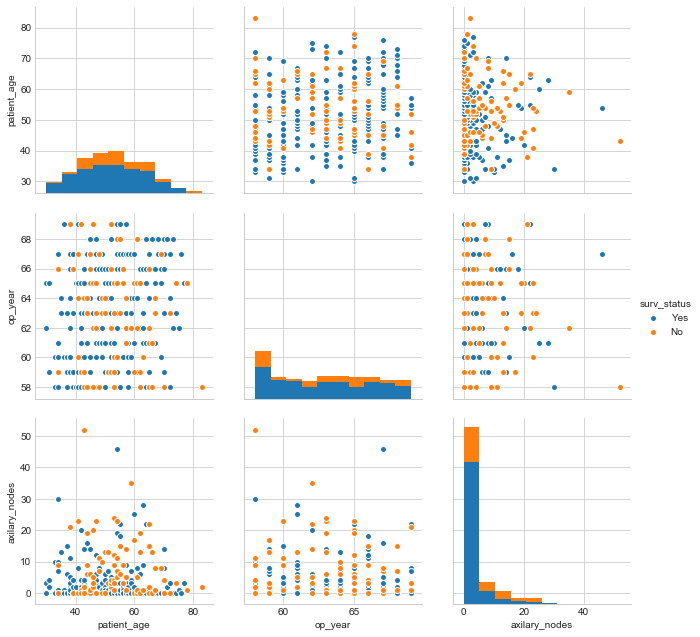

In [3]:
# pair plots
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="surv_status", size=3)
plt.show()

Observations: all plots are overlapped . can not be linearly seperable Patient survival chances are more if age less than 34 or age less than 34 and nodes less than 5

Final conclusions: 1.As axillary nodes number increases survival chances decreases . 2.If age is less than 34 then survival chances are higher and if age is greater than 77 survival chances are lower. In between age 34 to 77 survival chances are not depends on Age of patient . 3.Surviving Chances does not depend upon year of operation except operation year before 1959 surviving chances was lower.